In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.spatial import Delaunay
from pathlib import Path

In [7]:
!mkdir outputs

In [2]:
plane = plt.imread("./plane.png")
red = plt.imread("./red.png")
accept = plt.imread("./accept.png").sum(axis=2) < 4

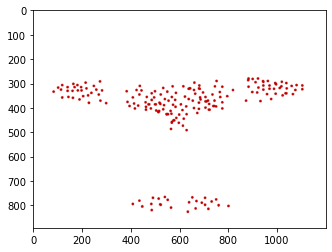

In [3]:
def extract_anchor_img(x, i):
    sigma = x.sum(axis=2)
    y = np.copy(x)
    red_layer = x[:, :, 0]
    mask = (sigma > 1) & (red_layer > 0.5) | (red_layer < 0.5)
    
    for i in range(3):
        layer = y[:, :, i]
        layer[mask] = 1
        y[:, :, i] = layer
        
    return y

anchor_img = extract_anchor_img(red, 1)
plt.imshow(anchor_img)

In [4]:
def get_anchor_points(anchor_img):
    m, n, _ = anchor_img.shape
    I = np.tile(np.arange(m).reshape(-1, 1), n)
    J = np.tile(np.arange(n).reshape(-1, 1), m).T
    mask = anchor_img.sum(axis=2) != 3
    return list(zip(I[mask], J[mask]))


anchor_points = get_anchor_points(anchor_img)

In [5]:
hull = Delaunay(anchor_points)

AttributeError: 'Figure' object has no attribute 'close'

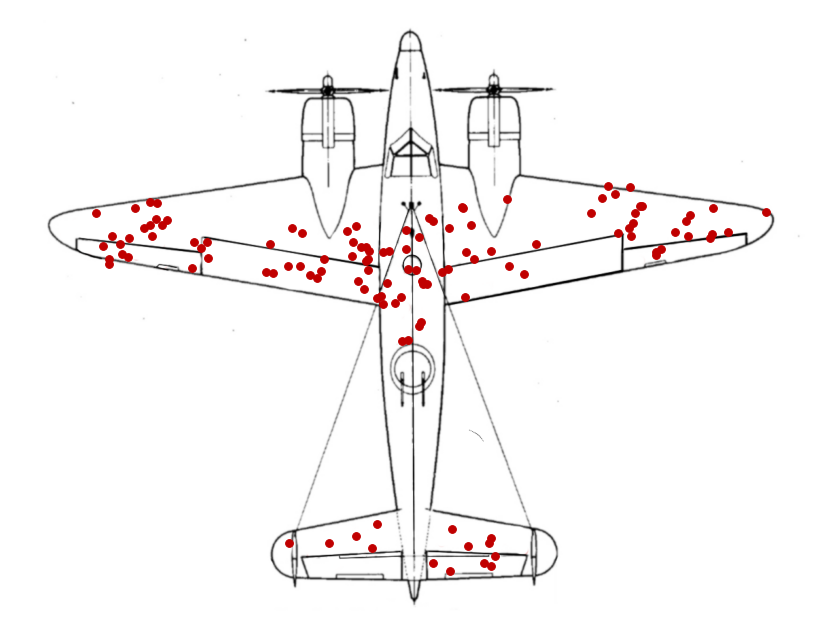

In [12]:
def plot_sampled_survivorship(plane, anchor_points, accept, jitter=20):
    dpi = 80
    h, w, _ = plane.shape
    figsize = w / dpi, h / dpi
    fig = plt.figure(figsize=figsize)
    plt.imshow(plane)

    jitter = 20
    x, y = [], []
    while len(x) < 120:
        i, j = random.choice(anchor_points)
        i = i + np.random.randint(-jitter, jitter+1)
        j = j + np.random.randint(-jitter, jitter+1)

        if accept[i, j]:
            x.append(j)
            y.append(i)

    plt.scatter(x, y, s=60, marker='o', lw=1, color='#c00000')
    plt.gca().set_axis_off()
    
for i in range(100):
    plot_sampled_survivorship(plane, anchor_points, accept)
    plt.savefig(Path("outputs") / f"{i:03d}_plane.png")

In [15]:
!rm outputs/plane.mp4
!ffmpeg -f image2 -framerate 9 -i outputs/%03d_plane.png outputs/plane.mp4

rm: outputs/plane.mp4: No such file or directory
ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with Apple clang version 12.0.0 (clang-1200.0.32.27)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/4.3.1_4 --enable-shared --enable-pthreads --enable-version3 --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librtmp --enable-libspeex --enable-libsoxr --enable-videotoolbox --disable-libjack -